# Question Answers Analysis (Cycle 3 only!)
- This notebook has analysis of the question answers and how each student performed

## Load data and imprt packages

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

c3questions = pd.read_excel("../data/Cycle 3/C3 Questions.xlsx")     # Questions
c3answers = pd.read_excel("../data/Cycle 3/C3 Answers.xlsx")         # Answers
c3courses = pd.read_excel("../data/Cycle 3/C3 Courses.xlsx")         # Courses
c4usercourses = pd.read_excel("../data/Cycle 4/C4UsersCourses.xlsx") # Groups

## Explore data
- We will look at the questions data first, followed by the answers data
- This will give us a good overview of what ranges our values lie in and any bias we need to consider
- Keep in mind each student was required to answer 40 questions!

### Questions data

In [2]:
c3questions.head()

,id,course_id,timestamp,user,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation
0,4421360,21230,2020-04-07 22:29:54,217514,2.50,29,20,1,0.7500,2,0,B,The telomeric repeat sequence in green algae ...,5,<p>5&prime; UUUUAGGGUUUU 3&prime;<br /><br />...,<p>5&prime; CCCUAAAACCCU 3&prime;<br /><br />...,<p>5&prime; CCCTAAAACCCT 3&prime;<br /><br />...,<p>5&prime; TTTTAGGGTTTT 3&prime;<br /><br />...,<p>5&prime; AGGGTTTTAGGG 3&prime;</p> ...,<p>no explanation</p> ...
1,4421361,21230,2020-04-07 22:30:18,217514,3.27,37,22,3,0.9091,1,0,D,Which of the following types of protein could...,4,<p>A protein which forms part of a growth fac...,<p>A protein which codes for a DNA repair enz...,<p>A protein which helps prevent apoptosis.</...,<p>A protein which controls progression throu...,...,<p>Tumour suppressor genes code for proteins ...
2,4421362,21230,2020-04-07 22:30:18,217514,2.96,32,24,1,0.5000,0,0,C,"In the cell cycle, the oncogenes are ________...",4,<p>the negative controls over growth;&nbsp;in...,<p>resulted from the activation of proto-onco...,<p>resulted from the activation of proto-onco...,<p>inactivated which causes cancer;&nbsp;the ...,...,"<p>In the cell cycle, there are two main type..."
3,4421363,21230,2020-04-07 22:30:19,217514,1.67,31,21,0,0.9524,3,0,C,"<img src=""../images/view.php?file=374795"" alt...",4,<p>G0</p> ...,<p>G2/M</p> ...,<p>G1</p> ...,<p>S</p> ...,...,<p>The answer is G1 cells as there is the lea...
4,4421364,21230,2020-04-07 22:30:19,217514,2.67,32,21,1,0.2857,0,0,D,"If there are 20 chromatids in a cell, how man...",5,<p>30</p> ...,<p>20</p> ...,<p>40</p> ...,<p>10</p> ...,<p>80</p> ...,<p>This is because each chromosome has exactl...


- We aren't interested in the number of alts or the alternate options (only the correct answer)
- We will use the correct answer to calculate the percentage correct for each of the users
What about the answers data?

<AxesSubplot:>

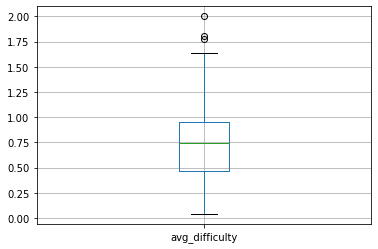

In [3]:
c3questions.boxplot('avg_difficulty')

<AxesSubplot:>

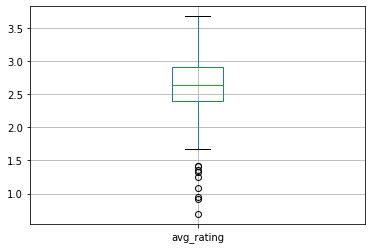

In [4]:
c3questions.boxplot('avg_rating')

- Most students rated question difficulty quite low
- Most questions had a reasonable rating so hopefully question quality does not affect our analysis too much (but keep in mind)
- Let's see how they do in answering these questions

### Answers data

In [5]:
c3answers.head()

,id,timestamp,user,question_id,answer,last_answer,result,cousreID
0,69566868,2020-04-08 00:24:47,636020,4421443,B,NaN,2,21230
1,69566931,2020-04-08 00:28:00,636020,4421442,D,NaN,2,21230
2,69567000,2020-04-08 00:32:09,636020,4421441,E,E,4,21230
3,69567037,2020-04-08 00:34:12,636020,4421440,B,B,4,21230
4,69567139,2020-04-08 00:40:17,636020,4421439,C,D,2,21230


- We will use the 'answer' column to determine if a student got a question correct

## Pre-processing and joins
- Firstly we'll construct dataframes using a subset of the columns (we don't need them all)
- We'll also rename some of these columns for clarity

In [6]:
qs_selected = c3questions[['id', 'timestamp', 'user', 'avg_rating', 'avg_difficulty', 'total_responses', 'total_comments', 'answer', 'course_id']] # Select certain columns
qs_selected = qs_selected.rename(columns={'id' : 'question_id', 'timestamp' : 'question_time', 'user' : 'user_id', 'answer' : 'correct_answer'})                   # Rename
qs_selected.head()

,question_id,question_time,user_id,avg_rating,avg_difficulty,total_responses,total_comments,correct_answer,course_id
0,4421360,2020-04-07 22:29:54,217514,2.50,0.7500,29,2,B,21230
1,4421361,2020-04-07 22:30:18,217514,3.27,0.9091,37,1,D,21230
2,4421362,2020-04-07 22:30:18,217514,2.96,0.5000,32,0,C,21230
3,4421363,2020-04-07 22:30:19,217514,1.67,0.9524,31,3,C,21230
4,4421364,2020-04-07 22:30:19,217514,2.67,0.2857,32,0,D,21230


In [7]:
ans_selected = c3answers[['id', 'timestamp', 'user', 'question_id', 'answer']]
ans_selected = ans_selected.rename(columns={'id' : 'answer_id', 'timestamp' : 'answer_time', 'user' : 'user_id', 'answer' : 'chosen_answer'})
ans_selected.head()

,answer_id,answer_time,user_id,question_id,chosen_answer
0,69566868,2020-04-08 00:24:47,636020,4421443,B
1,69566931,2020-04-08 00:28:00,636020,4421442,D
2,69567000,2020-04-08 00:32:09,636020,4421441,E
3,69567037,2020-04-08 00:34:12,636020,4421440,B
4,69567139,2020-04-08 00:40:17,636020,4421439,C


- We now have a much more organised questions dataframe, containing all the information we require for our analysis
- The column headings are also much clearer

## Analysis

### Merging answers with questions
- Need to do this so we know what the correct answer is!
- `q_and_a` will be the answers but with the correct answer as well
- We may need more information about a particular question later but for now this is ok

In [8]:
q_and_a = ans_selected.merge(qs_selected[['question_id', 'correct_answer']], on='question_id')
q_and_a.head()

,answer_id,answer_time,user_id,question_id,chosen_answer,correct_answer
0,69566868,2020-04-08 00:24:47,636020,4421443,B,B
1,69567865,2020-04-08 01:09:42,636029,4421443,B,B
2,69570815,2020-04-08 03:03:02,635998,4421443,A,B
3,69583371,2020-04-08 10:34:31,635992,4421443,B,B
4,69595122,2020-04-08 14:55:46,636019,4421443,A,B


### Finding the % of correct answers by each student
- We're going to calculate how many questions each student got correct
- Then using the total number of answers for each student, we will find the percentage of questions that each student got correct using the following formula $\frac{\text{num_correct}}{\text{total_answers}}$

<AxesSubplot:>

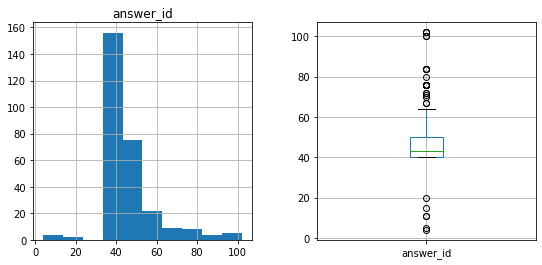

In [9]:
answers_by_student = q_and_a[['user_id', 'answer_id']].groupby('user_id', as_index=False).count() # Count number of answers per user

# Plot summary statistics for number of questions answered
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(9,4))
answers_by_student.hist('answer_id', ax=ax)
answers_by_student.boxplot('answer_id', ax=ax2)

**Interesting summaries:**
- Most students answered 40 questions (the required amount)
- Some students answered less than 20
- Some students answered 100 questions

- Now let's move on to the calculation of the number of correct answers
- We'll start by adding a new bool column to indicate whether a student was correct

<AxesSubplot:>

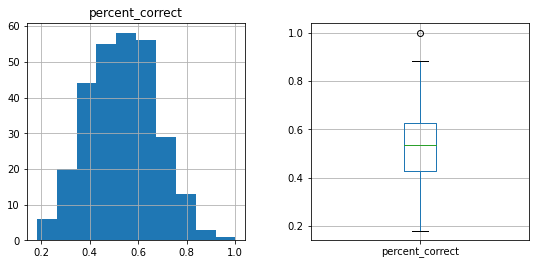

In [10]:
q_and_a['student_correct'] = q_and_a['chosen_answer'] == q_and_a['correct_answer']                    # Add new bool column to indicate whether an answer was correct
correct_by_student = q_and_a[['user_id', 'student_correct']].groupby('user_id', as_index=False).sum() # Create new dataframe and count number of correct answers, summing our new bool column

correct_by_student['total_answers'] = answers_by_student['answer_id']
correct_by_student['percent_correct'] = correct_by_student['student_correct'] / correct_by_student['total_answers']  # Calculate percentage of questions a student answered correctly

# Plot summary statistics for percentage of correct answers
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(9,4))
correct_by_student.hist('percent_correct', ax=ax)
correct_by_student.boxplot('percent_correct', ax=ax2)

- The percentage of correct answers follows a normal distrubution very closely
- Cool!

### Team distrubution of correctness
- Now that we have the percentage of correct answers for each student, lets look at how this carries across to teams
- First, let's join the students to their respective Cycle 4 groups

In [11]:
c4usercourses = c4usercourses.rename(columns={'user' : 'user_id', 'Team' : 'team'})     # Rename columns so we can merge neatly
answers_team = correct_by_student.merge(c4usercourses, on='user_id')                  # Merge dataframes so we have team data for each student
answers_team.head()

,user_id,student_correct,total_answers,percent_correct,course_id,team
0,269035,22,40,0.550000,21327,Blue
1,555695,24,40,0.600000,21320,Red
2,555866,36,57,0.631579,21328,Green
3,556210,13,40,0.325000,21327,Brown
4,556601,22,40,0.550000,21328,Brown


- We now have team data for each of our students
- Next step is to group by team and average the percent_correct for each team member

<AxesSubplot:xlabel='team'>

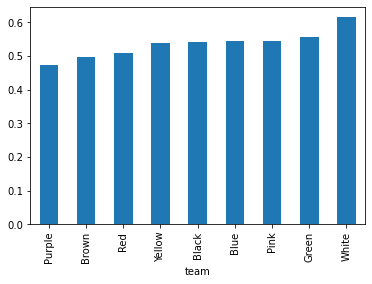

In [12]:
answers_groups_by_team = answers_team.groupby('team').mean()
answers_groups_by_team.sort_values(by='percent_correct')['percent_correct'].plot.bar()

- The white team got the highest average percentage correct and purple the lowest
- All teams are quite close together

<AxesSubplot:title={'center':'student_correct'}, xlabel='team'>

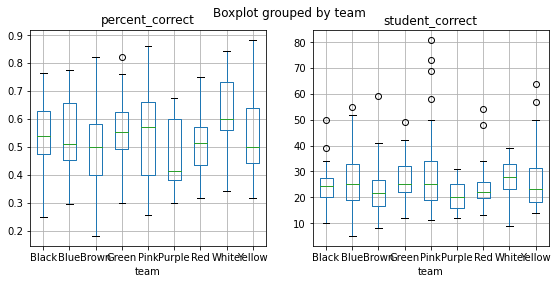

In [13]:
# Boxplots of percentage correct and number correct by team
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(9,4))
answers_team.boxplot('percent_correct', by='team', ax=ax)
answers_team.boxplot('student_correct', by='team', ax=ax2)

array([[<AxesSubplot:title={'center':'Black'}>,
        <AxesSubplot:title={'center':'Blue'}>,
        <AxesSubplot:title={'center':'Brown'}>],
       [<AxesSubplot:title={'center':'Green'}>,
        <AxesSubplot:title={'center':'Pink'}>,
        <AxesSubplot:title={'center':'Purple'}>],
       [<AxesSubplot:title={'center':'Red'}>,
        <AxesSubplot:title={'center':'White'}>,
        <AxesSubplot:title={'center':'Yellow'}>]], dtype=object)

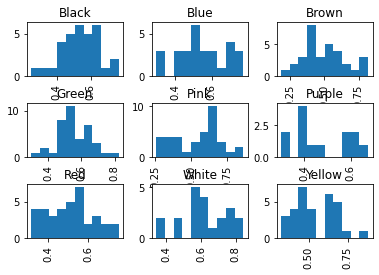

In [14]:
answers_team.hist('percent_correct', by='team')

- The teams are not too different from one another in distribution either,
- White team is definitely made up of the best performers on average though, with a min higher than all other groups, and a median higher than all other groups

### Investigating time
- We'll now investigate the time it took each student to answer a question and will use that as an indicator of 'motivation'
- First, we need to get a deadline by joining with the Courses data from Cycle 3

In [18]:
c3courses_selected = c3courses[['CourseID', 'StartDate', 'DeadlineAnswer']]
c3courses_selected = c3courses_selected.rename(columns={'CourseID' : 'course_id', 'StartDate' : 'start_date', 'DeadlineAnswer' : 'answer_deadline'})
qs_with_deadline = qs_selected.merge(c3courses_selected, on='course_id')

qs_with_deadline.head()

,question_id,question_time,user_id,avg_rating,avg_difficulty,total_responses,total_comments,correct_answer,course_id,start_date,answer_deadline
0,4421360,2020-04-07 22:29:54,217514,2.50,0.7500,29,2,B,21230,2020-04-06,2020-04-21 01:00:10
1,4421361,2020-04-07 22:30:18,217514,3.27,0.9091,37,1,D,21230,2020-04-06,2020-04-21 01:00:10
2,4421362,2020-04-07 22:30:18,217514,2.96,0.5000,32,0,C,21230,2020-04-06,2020-04-21 01:00:10
3,4421363,2020-04-07 22:30:19,217514,1.67,0.9524,31,3,C,21230,2020-04-06,2020-04-21 01:00:10
4,4421364,2020-04-07 22:30:19,217514,2.67,0.2857,32,0,D,21230,2020-04-06,2020-04-21 01:00:10


### Merging questions with deadline to answers
- We've joined to the answer deadline
- Now we need to join the questions with a deadline to their answers like we did previously

In [30]:
q_and_a_deadline = ans_selected.merge(qs_with_deadline[['question_id', 'correct_answer', 'start_date', 'answer_deadline']], on='question_id')
q_and_a_deadline = q_and_a_deadline.astype({'answer_time' : 'datetime64'})
q_and_a_deadline.head()

,answer_id,answer_time,user_id,question_id,chosen_answer,correct_answer,start_date,answer_deadline
0,69566868,2020-04-08 00:24:47,636020,4421443,B,B,2020-04-06,2020-04-21 01:00:10
1,69567865,2020-04-08 01:09:42,636029,4421443,B,B,2020-04-06,2020-04-21 01:00:10
2,69570815,2020-04-08 03:03:02,635998,4421443,A,B,2020-04-06,2020-04-21 01:00:10
3,69583371,2020-04-08 10:34:31,635992,4421443,B,B,2020-04-06,2020-04-21 01:00:10
4,69595122,2020-04-08 14:55:46,636019,4421443,A,B,2020-04-06,2020-04-21 01:00:10


- We now have a dataframe with an answer on each row, with the task start date, as well as the answer deadline and time
- Let's analyze the time data by:
    - Creating a new column for storing the time before the due date a question was answered
    - Creating a column to indicate if a question was answered late

<AxesSubplot:ylabel='Frequency'>

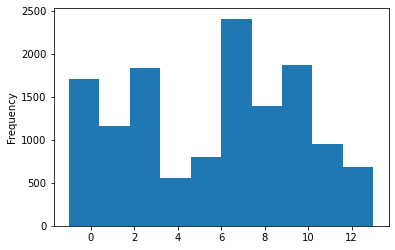

In [51]:
q_and_a_deadline['time_delta'] = q_and_a_deadline['answer_deadline'] - q_and_a_deadline['answer_time']  # 'Time difference between due date and answer time' column
q_and_a_deadline['late'] = q_and_a_deadline['time_delta'].dt.days < 0                                   # 'Answer was posted late' column

q_and_a_deadline['time_delta'].dt.days.plot.hist() # Plot days before due date

- The above histogram shows the number of days people answered before the deadline